In [25]:
import numpy as np 
import pyjet
from pysubjet import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import mplhep as hep 
plt.style.use(hep.style.ROOT) # For now ROOT defaults to CMS

In [26]:
data=pd.read_hdf('LHColympics2020/events_anomalydetection_tiny.h5')
data

,0,1,2,3,4,5,6,7,8,9,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,0.324101,-0.361158,2.737669,0.409859,-2.429939,0.729830,0.867922,-2.267777,-1.161310,0.383031,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.646304,-0.539460,-1.386258,0.471293,-1.636572,0.751657,0.453769,-1.099593,-0.393405,0.485929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.325172,-0.833948,2.404844,1.295058,-2.089618,-1.873342,0.451272,-0.101877,2.217348,0.461293,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.290918,-2.200063,1.630132,0.565028,-1.714345,-2.617103,0.951042,-0.532720,2.941473,0.896248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.526330,-2.349110,-1.745532,0.542491,-2.080352,-3.044045,0.390727,-1.278563,-2.131058,2.530358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.558454,-0.667654,0.445050,0.220177,-1.109788,2.691200,0.426006,-1.355901,2.359371,0.188318,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,3.224277,-2.394595,-1.716092,0.461683,-2.102307,-2.378719,0.444322,-0.673169,1.017897,0.664407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.308288,-0.381152,-2.721488,2.390583,-0.784246,-2.640125,2.609883,-0.758702,3.080750,2.774264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.195123,-2.203834,-3.064237,0.497103,-2.253029,-0.701283,0.434465,-1.692405,-2.279329,0.676338,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Cluster the first 10 events using fastjet's *anti-kt* algorithm with cone radius of *R=1.0* and a minimum jet pt of 200 GeV:

In [31]:
with cluster_events(data=data, cluster_algorithm='anti_kt',  R=1.0, ptmin=200.0, stop=10) as event:
    for N, jets, truth in event:
            
        print("\n{0: <5} {1: >9} {2: >10} {3: >8} {4: >12} {5: >9} {6: >10} {7: >14}".format("event#","truth", "jet#", "pT", "eta", "phi", "mass", "#constit."))
        
        for n, jet in enumerate(jets[:6]):
            
            print("{0: <5} {1: 10.3f} {2: 10.3f} {3: 10.3f} {4: 10.3f} {5: 10.3f} {6: 10.3f} {7: 10}".format(N, truth, n + 1, jet.pt, jet.eta, jet.phi, jet.mass, len(jet)))



event#     truth       jet#       pT          eta       phi       mass      #constit.
0          0.000      1.000   1286.728      0.186     -2.764    106.912         36
0          0.000      2.000   1283.221      0.065      0.394     63.164         33

event#     truth       jet#       pT          eta       phi       mass      #constit.
1          0.000      1.000   1354.394      0.827      1.366    614.269         84
1          0.000      2.000   1325.614     -0.874     -1.786    439.064         97

event#     truth       jet#       pT          eta       phi       mass      #constit.
2          0.000      1.000   1214.956     -0.197      2.041    645.866        119
2          0.000      2.000   1072.462      0.144     -1.090    113.769         59

event#     truth       jet#       pT          eta       phi       mass      #constit.
3          0.000      1.000   1285.228      0.329      2.975    516.835         65
3          0.000      2.000   1220.251      0.295     -0.323    174.796

In [28]:
mJJ={'signal':[], 'background':[]}
pT={'signal':[], 'background':[]}
s=0 
b=0

with cluster_events(data=data, R=1.0, ptmin=20.0, stop=None) as event:
    for N, jets, truth in event:
                
        if len(jets)>1: 
            
            j1=jets[0]
            j2=jets[1]
            
            if truth:
                s+=1
                mJJ['signal'].append( inv_M(j1,j2) )
                pT['signal'].append(j1.pt)
                
            else:
                b+=1
                mJJ['background'].append(inv_M(j1,j2))
                pT['background'].append(j1.pt)

            
print('#signal={}, #background={}'.format(s,b))
                

#signal=93, #background=907


We can now plot some distrubtions:

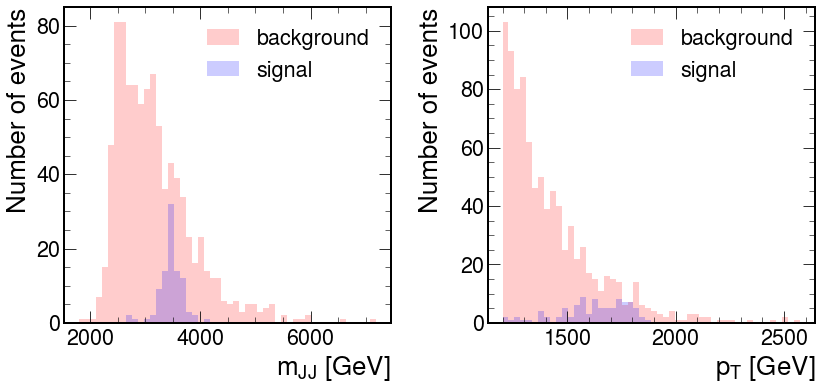

In [29]:
# some very simple plots:

fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1, 2, 1)
n,b,p = plt.hist(mJJ['background'], bins=50, facecolor='r', alpha=0.2,label='background')
plt.hist(mJJ['signal'], bins=b, facecolor='b', alpha=0.2,label='signal')
ax.set_xlabel(r'$m_{JJ}$ [GeV]')
ax.set_ylabel('Number of events')
plt.legend(loc='upper right')

ax = fig.add_subplot(1, 2, 2)
n,b,p = plt.hist(pT['background'], bins=50, facecolor='r', alpha=0.2,label='background')
plt.hist(pT['signal'], bins=b, facecolor='b', alpha=0.2,label='signal')
ax.set_xlabel(r'$p_T$ [GeV]')
ax.set_ylabel('Number of events')
plt.legend(loc='upper right')   

plt.tight_layout()